We would like to add snow density as a parameter that PEST can change. The following code is written to ensure as a trial version to ensure that the snow density value changes within the script. 

In [1]:
%matplotlib inline
import sys, os
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import sys,os
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime
import matplotlib.image as mpimg
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates

In [3]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colors
import matplotlib.cm
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [11]:

import subprocess
import shutil
import fileinput
import time
import re

In [5]:
os.chdir('/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest')

In [6]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest'

In [8]:
file_name = 'Case5_III_C_3yrs_testsd'

In [57]:
# Making a test directory 
os.system('mkdir testsd.demo')

0

In [58]:
os.chdir('testsd.demo')

In [59]:
# Running ats command
os.system(f"ats --xml_file=../{file_name}.xml")

0

In [44]:
os.chdir('..')

In [45]:
file_name

'Case5_III_C_3yrs_testsd'

In [46]:
def ats_run(file_name):
    """
    Function that calls & reproduces the command line options for executing ats. It involves mainly the following steps:
    1. Creating a demo directory : mkdir output_file_name.demo
    2. 'cd' into the demo directory : cd out_file_name.demo
    3. Excecuting the ats command : ats --xml_file=../input_file_name.xml &>out.log
    
    Note: To execute the command - Please be in the directory where the input xml file is present.
    
    Parameters:
    
    -----
    INPUT
    
    file_name : string
    
    The input xml file name and the directory name (both are the same). Ex: infiltration
    
    
    -----
    OUTPUT:
    
    Runs the ats command and dumps all the outputs in file_name_i.demo
    
    """
    # Removing the directory if it exists
    if os.path.isdir(f'{file_name}.demo/'):
        shutil.rmtree(f'{file_name}.demo/')
    
    # Making a new directory
    os.mkdir(f'{file_name}.demo')
    
    # Changing the directory to the demo directory
    os.chdir(f'{file_name}.demo/')
    
    # Running the ats command
    ats_command = f"ats --xml_file=../{file_name}.xml >out.log"
    
    os.system(ats_command)
    #output = os.popen(ats_command).read()
    
    #return output
    
    

In [28]:
output = ats_run(file_name)

In [47]:
os.getcwd()

'/home/rk/.local/share/Trash/files/Case5_III_C_3yrs_testsd.xml.demo'

In [22]:
os.chdir('..')

In [31]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest/Case5_III_C_3yrs_testsd.xml.demo'

In [33]:
ats_command = f"ats --xml_file=../{file_name}.xml"
    
os.system(ats_command)

256

In [ ]:
# Snow depth is also a input parameter - data collected from Dr. Xiao's article
Snow_depth = pd.read_excel('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/Yakou_metstation_data_2017_snowdepth.xlsx',sheet_name='snow_depth',index_col=0, parse_dates=True) 

# Filling the snow depth missing data with an average value
Snow_depth = Snow_depth.fillna(np.average(Snow_depth.loc['2017-12']))

# Concatatenating all the dataframes for the year 2016, 2017, 2018, 2019.

snow_depth_2016_2019 = np.concatenate([Snow_depth['Snow depth (m)'].values, Snow_depth['Snow depth (m)'].values, Snow_depth['Snow depth (m)'].values, Snow_depth['Snow depth (m)'].values])

# Note: The year 2016 has 366 days, hence I am adding the Dec 31st value once more
snow_depth_2016_2019 = np.insert(snow_depth_2016_2019, 366, Snow_depth['Snow depth (m)']['2017-12-31'])

# Creating a dataframe with four years of snow depth data

# The snow depth dataframe with the same index
Snow_depth_4_yrs = pd.DataFrame(index=pd.date_range(start='1/1/2016',end='31/12/2019',freq='D'),data = snow_depth_2016_2019, columns=['Snow depth (m)'])

# Calculating the snow water equivalent
Snow_depth_4_yrs['precipitation snow [m SWE s^-1]'] = Snow_depth_4_yrs['Snow depth (m)']*(snow_dens_ratio/86400)

# Storing the data in a seperate dataframe
data_SWE_input_calib = Snow_depth_4_yrs['2016':'2018']

# Opening the input file
hf_input = h5py.File('Snow_depth_data/SWE_2016_2018.h5','w')

# Creating a variable with time instances for 1096 days
no_days = len(data_SWE_input_calib) # Total number of days
no_secs_day = 86400 # Total number of seconds in a day
times = np.arange(0,no_days*no_secs_day,no_secs_day)
len(times)

# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times)
hf_input.create_dataset('precipitation snow [m SWE s^-1]', data=data_SWE_input_calib['precipitation snow [m SWE s^-1]'].values)

hf_input.close()


In [73]:
# Snow depth is also a input parameter - data collected from Dr. Xiao's article
Snow_depth = pd.read_excel('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/Yakou_metstation_data_2017_snowdepth.xlsx',sheet_name='snow_depth',index_col=0, parse_dates=True) 
Snow_depth.head()

,Snow depth (m)
Measurement Time,
2017-01-01,0.000375
2017-01-02,0.000208
2017-01-03,0.000125
2017-01-04,0.000458
2017-01-05,0.000250


In [74]:
# Calculating the average snow depth value in December:
np.average(Snow_depth.loc['2017-12'])

0.048606129032258055

In [75]:
# Filling the snow depth missing data with an average value

#data_AWS_input_2017['Snow depth (in m)'] = data_AWS_syn_input['Snow depth (in m)'].fillna(0)

Snow_depth = Snow_depth.fillna(np.average(Snow_depth.loc['2017-12']))

In [76]:
# Concatatenating all the dataframes for the year 2016, 2017, 2018, 2019.

snow_depth_2016_2019 = np.concatenate([Snow_depth['Snow depth (m)'].values, Snow_depth['Snow depth (m)'].values, Snow_depth['Snow depth (m)'].values, Snow_depth['Snow depth (m)'].values])

# Note: The year 2016 has 366 days, hence I am adding the Dec 31st value once more
snow_depth_2016_2019 = np.insert(snow_depth_2016_2019, 366, Snow_depth['Snow depth (m)']['2017-12-31'])

In [77]:
len(snow_depth_2016_2019)

1461

In [78]:
pd.date_range(start='1/1/2016',end='31/12/2019',freq='D')

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=1461, freq='D')

In [79]:
# Creating a dataframe with four years of snow depth data

# The snow depth dataframe with the same index
Snow_depth_4_yrs = pd.DataFrame(index=pd.date_range(start='1/1/2016',end='31/12/2019',freq='D'),data = snow_depth_2016_2019, columns=['Snow depth (m)'])

Snow_depth_4_yrs.head()

,Snow depth (m)
2016-01-01,0.000375
2016-01-02,0.000208
2016-01-03,0.000125
2016-01-04,0.000458
2016-01-05,0.000250


#### To define the SWE, the following file was considered: http://webarchiv.ethz.ch/arolla/Arolla_Data/SnowConditions/depth_to_swe.pdf
Snow water equivalent is the water content obtained from melting a sample of snow. Density is defined as the ratio of mass per unit volume. Since the mass of the sample is the same whether it is snow or water, the relationship can be expressed using the respective densities and volumes. 

Let $V_{snow}$ = the volume of the snow in the sample, $\rho_{snow}$ = the density of the snow in the sample, V_{water} = the volume of the water when the sample is melted, $\rho_{water}$ = the density of water.

Since the mass of the sample in snow and water remains the same:

$$ m_{water}  = m_{snow}$$

$$ \rho_{water} V_{water} = \rho_{snow} V_{snow} $$

Here, if the Area (A) is constant for both water and snow (it is!), then the $V_{water} = A * SWE$ and $V_{snow} = A * Z_s$ where SWE is the snow water equivalent, $Z_s$ is the depth of snow. We can now write the equation as

$$ \rho_{water} * A * SWE = \rho_{snow} * A * Z_s$$

Finally we have the equation:

$$  SWE = \frac{\rho_{snow} * Z_s}{\rho_{water}} $$

Here we also need the SWE in $m s^{-1}$ --> $Z_s$ is in m/day. $\rho_{water} = 1000 \frac{kg}{m^3}$, $\rho_{snow} = 1000 \frac{kg}{m^3}$. 

Based on the link - https://www.sciencelearn.org.nz/resources/1391-snow-and-ice-density, and Atchley article 2015. Assuming a average snow density between 50 - 1000 $\frac{kg}{m^3}$

Ex: $$ SWE (m s^{-1}) = \frac{450 * Z_s}{1000*86400} = 5.208E-06 * Z_s $$

In [115]:
snow_dens_ratio = 0.2

In [116]:
Snow_depth_4_yrs['precipitation snow [m SWE s^-1]'] = Snow_depth_4_yrs['Snow depth (m)']*(snow_dens_ratio/86400)

Snow_depth_4_yrs

,Snow depth (m),precipitation snow [m SWE s^-1]
2016-01-01,0.000375,8.680556e-10
2016-01-02,0.000208,4.822523e-10
2016-01-03,0.000125,2.893519e-10
2016-01-04,0.000458,1.060956e-09
2016-01-05,0.000250,5.787037e-10
...,...,...
2019-12-27,0.050770,1.175231e-07
2019-12-28,0.049060,1.135648e-07
2019-12-29,0.048640,1.125926e-07
2019-12-30,0.055130,1.276157e-07


In [117]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest'

In [118]:
os.chdir('/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_III_finaltest')

In [119]:
# Storing the data in a seperate dataframe
data_SWE_input_calib = Snow_depth_4_yrs['2016':'2018']

In [120]:
# Opening the input file
hf_input = h5py.File('Snow_depth_data/SWE_2016_2018.h5','w')

In [121]:
# Creating a variable with time instances for 1096 days
no_days = len(data_SWE_input_calib) # Total number of days
no_secs_day = 86400 # Total number of seconds in a day
times = np.arange(0,no_days*no_secs_day,no_secs_day)
len(times)

1096

In [122]:
# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times)
hf_input.create_dataset('precipitation snow [m SWE s^-1]', data=data_SWE_input_calib['precipitation snow [m SWE s^-1]'].values)

<HDF5 dataset "precipitation snow [m SWE s^-1]": shape (1096,), type "<f8">

In [123]:
hf_input.close()

In [124]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Snow_depth_data/SWE_2016_2018.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    print(np.array(hdf.get('precipitation snow [m SWE s^-1]')))
    print(len(np.array(hdf.get('precipitation snow [m SWE s^-1]'))))
    sd_02 = np.array(hdf.get('precipitation snow [m SWE s^-1]'))

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['precipitation snow [m SWE s^-1]', 'time [s]']


[8.68055556e-10 4.82252315e-10 2.89351852e-10 ... 1.12592593e-07
 1.27615741e-07 1.15925926e-07]
1096


In [94]:
sd_045

array([1.95312500e-09, 1.08506771e-09, 6.51041667e-10, ...,
       2.53333333e-07, 2.87135417e-07, 2.60833333e-07])

In [27]:
# 1. To find the snow density from the xml file
filename = f'{file_name}.xml'
line_sd = 1011

with open(f'{filename}') as oldfile:
            for line, content in enumerate(oldfile):
                if line == line_sd: # Line 603 (+1) has the porosity_peat 
                    sd_line = str(content)
                    result = re.findall('\".*?\"', sd_line)
                    #print(result)
                    snow_dens_ratio = float(result[2].replace('"',''))
                    #print(snow_density_ratio)



# Snow depth is also a input parameter - data collected from Dr. Xiao's article
Snow_depth = pd.read_excel('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/Yakou_metstation_data_2017_snowdepth.xlsx',sheet_name='snow_depth',index_col=0, parse_dates=True) 

# Filling the snow depth missing data with an average value
Snow_depth = Snow_depth.fillna(np.average(Snow_depth.loc['2017-12']))
# Snow depth is also a input parameter - data collected from Dr. Xiao's article
Snow_depth = pd.read_excel('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/Yakou_metstation_data_2017_snowdepth.xlsx',sheet_name='snow_depth',index_col=0, parse_dates=True) 

# Filling the snow depth missing data with an average value
Snow_depth = Snow_depth.fillna(np.average(Snow_depth.loc['2017-12']))

# Concatatenating all the dataframes for the year 2016, 2017, 2018, 2019.

snow_depth_2016_2019 = np.concatenate([Snow_depth['Snow depth (m)'].values, Snow_depth['Snow depth (m)'].values, Snow_depth['Snow depth (m)'].values, Snow_depth['Snow depth (m)'].values])

# Note: The year 2016 has 366 days, hence I am adding the Dec 31st value once more
snow_depth_2016_2019 = np.insert(snow_depth_2016_2019, 366, Snow_depth['Snow depth (m)']['2017-12-31'])

# Creating a dataframe with four years of snow depth data

# The snow depth dataframe with the same index
Snow_depth_4_yrs = pd.DataFrame(index=pd.date_range(start='1/1/2016',end='31/12/2019',freq='D'),data = snow_depth_2016_2019, columns=['Snow depth (m)'])

# Calculating the snow water equivalent
Snow_depth_4_yrs['precipitation snow [m SWE s^-1]'] = Snow_depth_4_yrs['Snow depth (m)']*(snow_dens_ratio/86400)

# Storing the data in a seperate dataframe
data_SWE_input_calib = Snow_depth_4_yrs['2016':'2018']

# Opening the input file
hf_input = h5py.File('Snow_depth_data/SWE_2016_2018.h5','w')

# Creating a variable with time instances for 1096 days
no_days = len(data_SWE_input_calib) # Total number of days
no_secs_day = 86400 # Total number of seconds in a day
times = np.arange(0,no_days*no_secs_day,no_secs_day)
len(times)

# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times)
hf_input.create_dataset('precipitation snow [m SWE s^-1]', data=data_SWE_input_calib['precipitation snow [m SWE s^-1]'].values)

hf_input.close()

In [28]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Snow_depth_data/SWE_2016_2018.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    print(np.array(hdf.get('precipitation snow [m SWE s^-1]')))
    print(len(np.array(hdf.get('precipitation snow [m SWE s^-1]'))))
    sd_045_itr = np.array(hdf.get('precipitation snow [m SWE s^-1]'))

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['precipitation snow [m SWE s^-1]', 'time [s]']


[1.95312500e-09 1.08506771e-09 6.51041667e-10 ... 2.53333333e-07
 2.87135417e-07 2.60833333e-07]
1096


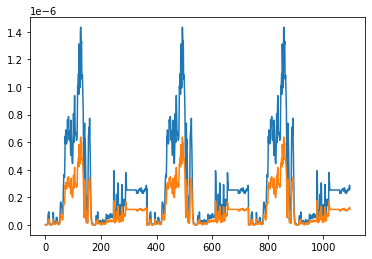

In [29]:
#plt.plot(sd_01)
#plt.plot(sd_02)
plt.plot(sd_045_itr)
plt.plot(sd_01_itr)

### Makre sure that the initial value of snow density is the same for also the generated h5 file

### Extracting the snow density value from the xml file